# Problemas de clasificación

Ernesto Ignacio Borbón Martínez

José de Jesús Gutiérrez Aldrete

Luis Felipe Villaseñor Navarrete

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
import statistics
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import imblearn

## Problema 1

### Validación cruzada con 5 pliegues

In [2]:
iris = datasets.load_iris()

In [3]:
xi = iris.data
yi = iris.target

clf = svm.SVC(kernel = 'rbf')


kf = KFold(n_splits=5, shuffle = True)
clf = svm.SVC(kernel = 'rbf')

acc = 0
rec = np.array([0., 0., 0.])
pre = np.array([0., 0., 0.])

for train_index, test_index in kf.split(xi):
    
    # Training phase
    xi_train = xi[train_index, :]
    yi_train = yi[train_index]
    clf.fit(xi_train, yi_train)

    # Test phase
    xi_test = xi[test_index, :]
    yi_test = yi[test_index]    
    yi_pred = clf.predict(xi_test)
    
    acc+=(accuracy_score(yi_test, yi_pred))
    rec+=(recall_score(yi_test, yi_pred, average=None))
    pre+=(precision_score(yi_test, yi_pred, average=None))
    
acc = acc/5
rec = rec/5
pre = pre/5

In [4]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.9533333333333335
Recall:  [1.         0.92467532 0.92181818]
Precision:  [1.         0.92       0.93681818]


### LOOCV

In [5]:
clf = svm.SVC(kernel = 'rbf')
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
acc = 0
i=0
tp0 = 0
tp1 = 0
tp2 = 0
fp0 = 0
fp1 = 0
fp2 = 0
fn0 = 0
fn1 = 0
fn2 = 0
rec = np.array([0., 0., 0.])
pre = np.array([0., 0., 0.])
for train_index, test_index in loo.split(xi):
    # Training phase
    xi_train = xi[train_index, :]
    yi_train = yi[train_index]
    clf.fit(xi_train, yi_train)

    # Test phase
    xi_test = xi[test_index, :]
    yi_test = yi[test_index]    
    yi_pred = clf.predict(xi_test)
    acc+=(accuracy_score(yi_test, yi_pred))
    if yi_test == yi_pred:
        if yi_test[0] == 0:
            tp0 += 1
        if yi_test[0] == 1:
            tp1 += 1
        if yi_test[0] == 2:
            tp2 += 1
    else:
        if yi_pred[0] == 0:
            fp0 += 1
        if yi_pred[0] == 1:
            fp1 += 1
        if yi_pred[0] == 2:
            fp2 += 1
        if yi_test[0] == 0:
            fn0 += 1
        if yi_test[0] == 1:
            fn1 += 1
        if yi_test[0] == 2:
            fn2 += 1
acc = acc/150
rec0 = tp0/(tp0+fn0)
rec1 = tp1/(tp1+fn1)
rec2 = tp2/(tp2+fn2)
rec = [rec0, rec1, rec2]
pre0 = tp0/(tp0+fp0)
pre1 = tp1/(tp1+fp1)
pre2 = tp2/(tp2+fp2)
pre = [pre0, pre1, pre2]

In [6]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.9666666666666667
Recall:  [1.0, 0.96, 0.94]
Precision:  [1.0, 0.9411764705882353, 0.9591836734693877]


### Repeated k-fold

In [7]:
rkf = RepeatedKFold(n_splits=5, n_repeats=100, random_state=2652124)
for train_index, test_index in rkf.split(xi):
    xi_train, xi_test = xi[train_index], xi[test_index]
    yi_train, yi_test = yi[train_index], yi[test_index]

In [8]:
xi = iris.data
yi = iris.target
mean_accs = []
count = 0
acc = []
rkf = RepeatedKFold(n_splits=5, n_repeats=100, random_state=42)
for train_index, test_index in rkf.split(xi):
    xi_train, xi_test, yi_train, yi_test = xi[train_index,:], xi[test_index,:], yi[train_index], yi[test_index]
    clf.fit(xi_train, yi_train)
    yi_pred = clf.predict(xi_test)
    acc.append(accuracy_score(yi_test, yi_pred))
    count += 1
    if count == 5:     
        mean_accs.append(statistics.mean(acc))
        acc.clear()
        count = 0


## Problema 2

In [9]:
wine = datasets.load_wine(as_frame = True)

### ¿Cuántas variables y observaciones por clase hay en este conjunto de datos?

In [10]:
features = wine.feature_names
len(features)

13

In [11]:
X_2 = wine.data
y_2 = wine.target
#plt.hist(y_2, bins = 3)
pd.DataFrame(y_2)['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

Hay 13 variables, 59 observaciones de la clase 0, 71 observaciones de la clase 1 y 48 observaciones de la clase 2. 

### ¿Qué representan los predictores?

In [12]:
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Alcohol: porcentaje de alcohol.

Malic acid: ácido málico.

Ash: Ceniza.

Alcalinity of ash: alcalinidad de ceniza.

Magnesium: magnesio.

Total phenols: fenoles totales.

Flavanoids: flavanoides.

Nonflavanoid phenols: fenoles no flavanoides.

Proanthocyanins: Proantocianinos.

Color intensity: intensidad del color.

Hue: tono del color.

OD280/OD315 of diluted wines: OD280 / OD315 en vinos diluidos.

Proline: prolino.

### Calculen la exactitud de los siguientes modelos de clasificación con k-fold cross validation (k = 5) para la base de datos Wine :

In [13]:
kf_2 = KFold(n_splits=5, shuffle = True, random_state = 42)

In [14]:
kf_2.split(X_2)

<generator object _BaseKFold.split at 0x7fcf25517a50>

In [15]:
accuracies2 = []
clf1 = svm.SVC(kernel = 'linear')
clf2 = svm.SVC()
clf3 = KNeighborsClassifier(n_neighbors = 3)
clf4 = DecisionTreeClassifier()
clf5 = xgb.XGBClassifier()

In [16]:
classifiers = [clf1,clf2,clf3,clf4,clf5]

In [17]:
for clf in classifiers:
    for train_index, test_index in kf_2.split(X_2):
        X_train, X_test = X_2.iloc[train_index,:], X_2.iloc[test_index,:]
        y_train = y_2[train_index] 
        y_test = y_2[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf1.predict(X_test)
        accuracy = accuracies2.append(accuracy_score(y_test, y_pred))
    mean_accuracy = statistics.mean(accuracies2)
    print("accuracy of",clf,":",mean_accuracy)

accuracy of SVC(kernel='linear') : 0.9495238095238095
accuracy of SVC() : 0.9719047619047619
accuracy of KNeighborsClassifier(n_neighbors=3) : 0.9793650793650793
accuracy of DecisionTreeClassifier() : 0.9830952380952381


accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) : 0.9853333333333333


El clasificador más exacto fue el clasificador de XGBoost. 

## Problema 3

### Carguen la base de datos misteriosa 1  descargar, y calculen la exactitud de un clasificador SVM lineal con k-fold cross validation (k = 5).  

In [18]:
dfm1 = pd.read_csv('misterious_data_1.txt', header = None, delimiter = "\t")

In [19]:
dfm1.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1,0.469168,0.178952,0.255712,0.744816,1.246886,1.254866,0.804426,0.412733,0.258974,...,0.993407,-0.592111,-1.301687,-1.066966,-0.722061,-0.622120,-0.396476,0.133550,0.594973,0.691093
1,1,0.184388,0.194901,0.386090,0.796802,1.066347,0.799498,0.074394,-0.544738,-0.580456,...,-0.003908,-0.167604,-0.428945,-0.725686,-1.053406,-1.276862,-1.183251,-0.693138,0.016754,0.573650
2,1,-0.173341,0.145202,-0.304082,-1.414886,-2.213521,-1.913048,-0.831063,-0.007732,0.002380,...,1.902134,3.393694,3.131702,1.403325,-0.030289,-0.271096,-0.198293,-0.751224,-1.350148,-0.882644
3,1,-0.268590,0.599522,1.307578,1.167486,0.251935,-0.585627,-0.553452,0.185590,0.613321,...,-1.296833,-0.876860,-1.043880,-1.516590,-1.531095,-1.016308,-0.483549,-0.267818,-0.367672,-0.666145
4,1,2.525379,2.852672,2.172197,0.637552,-0.600348,-0.702175,-0.074887,0.279032,-0.025487,...,-0.890283,-0.624969,-0.753863,-0.854603,-0.736751,-0.614611,-0.587151,-0.409589,0.087732,0.646462


In [20]:
dfm1.iloc[:,0].unique()

array([1, 2])

In [21]:
dfm1.iloc[:,0].value_counts()

1    264
2    264
Name: 0, dtype: int64

In [22]:
y = dfm1.iloc[:,0]
X = dfm1.iloc[:,1:]

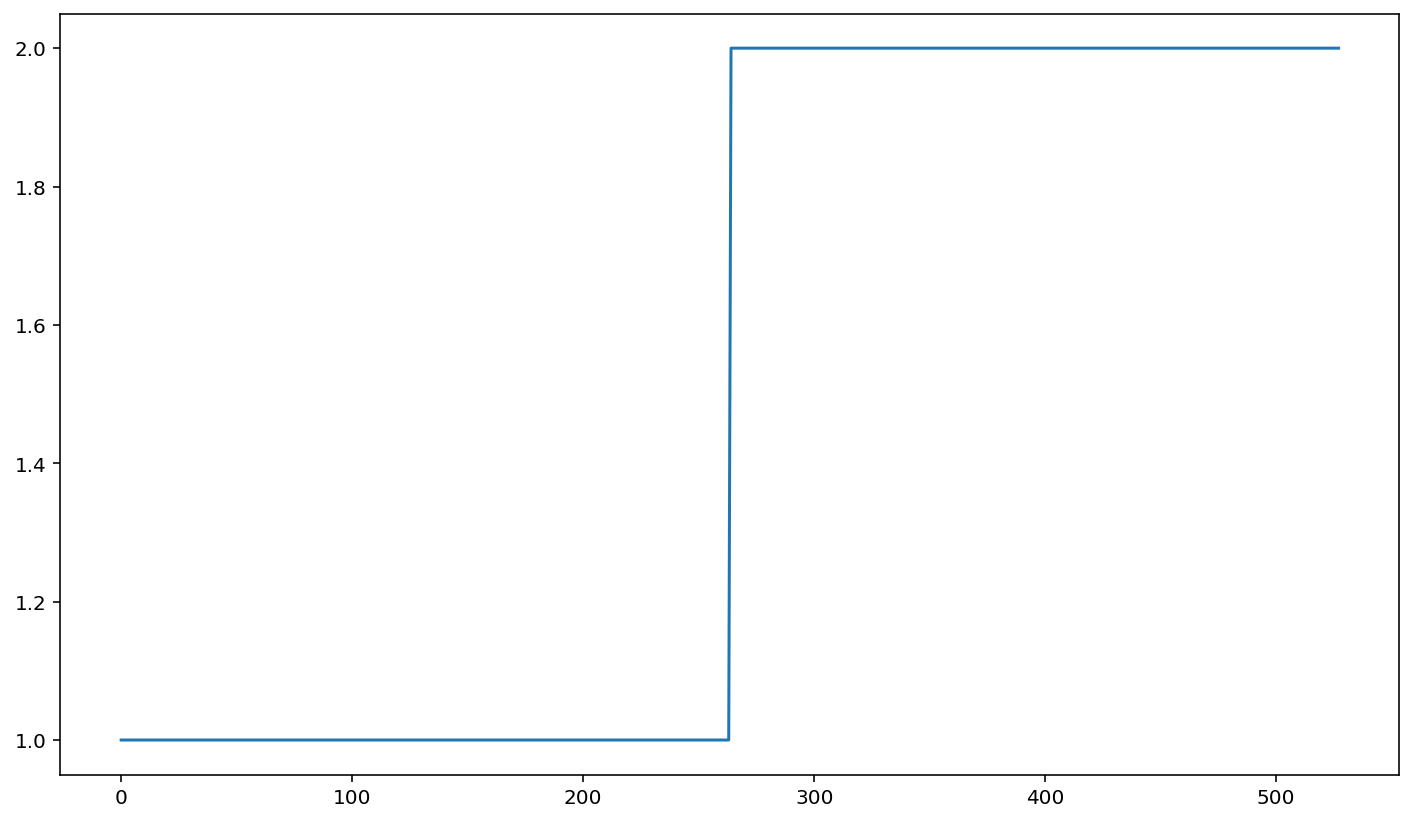

In [23]:
plt.plot(y)

Como podemos observar, el dataframe viene ordenado según la clase que intentamos predecir, por lo tanto usaremos un K-Fold con shuffle

In [24]:
kf = KFold(n_splits=5, shuffle = True, random_state = 42)

In [25]:
scores = []
clf = svm.SVC(kernel = 'linear')
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [26]:
print(scores)

[0.7830188679245284, 0.7924528301886793, 0.8113207547169812, 0.7047619047619048, 0.7523809523809524]


In [27]:
statistics.mean(scores)

0.7687870619946092

### Seleccionen aleatoriamente el 10% de todas las observaciones de la base de datos misteriosa, y repitan la evaluación del clasificador con k-fold cross validation pero con los datos seleccionados. Repitan el paso anterior, pero con 15%, 20%, 25%, 30%, 35%, 40%, ..., 95% de los datos.

In [28]:
acc_per_perc = []
porcentajes = []
porcentaje = 0.10
while porcentaje <= 0.95:
    dfms = dfm1.sample(frac = porcentaje, random_state = 42)
    y = dfms.iloc[:,0]
    X = dfms.iloc[:,1:]
    scores = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    clf = svm.SVC(kernel = 'linear')
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    acc_per_perc.append(statistics.mean(scores))
    #print(acc_per_perc)
    scores = []
    porcentajes.append(porcentaje)
    porcentaje += 0.05

### De acuerdo a los resultados del apartado anterior,  ¿cuántas observaciones creen que son necesarias para entrenar el modelo para el tipo de datos probados?

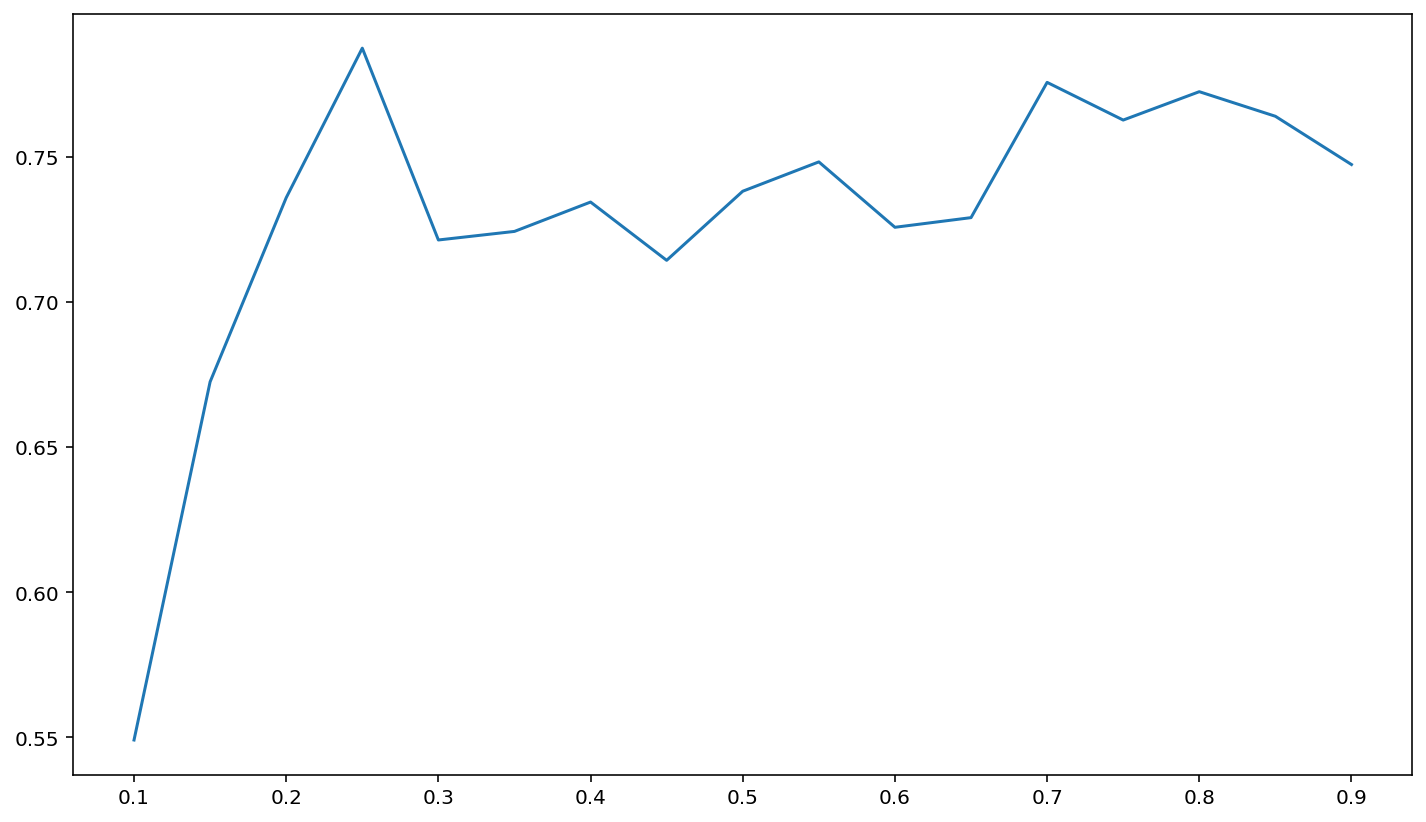

In [29]:
plt.plot(porcentajes,acc_per_perc)

In [30]:
pop = porcentajes[acc_per_perc.index(max(acc_per_perc))]
print(pop)
print(acc_per_perc[porcentajes.index(pop)])

0.25
0.7874643874643874


El porcentaje de datos seleccionados aleatoriamente con el random state 42 que maximizó la precisión del modelo fue de 25%, es decir 132 observaciones, de los cuales 4/5 fueron utilizados para entrenar el modelo, es decir 106 observaciones.
Consideramos que la precisión del modelo aumentó significativamente al usar 106 observaciones y pueden ser suficientes alrededor de 100 para entrenar el modelo. Cabe mencionar que 106 podría no ser el tamaño óptimo del dataset de entrenamiento ya que también se reduce el tamaño del set de prueba y también depende del random seed utilizado.

## Problema 4

### Carguen la base de datos misteriosa 2  descargar, y calculen la exactitud de un clasificador k-NN con k-fold cross validation (5 pliegues), para k = 1, 2, 3, 4, ..., 40 del clasificador. De acuerdo a los resultados del apartado anterior, ¿qué valor de k es el óptimo para los datos probados

In [31]:
dfm2 = pd.read_csv('misterious_data_2.txt', header = None, delimiter = "\t")
dfm2.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,1,-0.405533,2.242719,2.242719,-0.405533,0.095136,2.367101,2.367101,0.095136,2.161999,...,-0.389916,-1.546940,-0.274864,-3.930365,-3.930365,-0.274864,-0.424959,-3.588486,-3.588486,-0.424959
1,1,-1.238295,-1.011814,-1.011814,-1.238295,-1.154385,-0.921107,-0.921107,-1.154385,-1.051711,...,-1.623023,-2.470321,-1.540529,-4.600303,-4.600303,-1.540529,-1.686461,-4.496301,-4.496301,-1.686461
2,1,-0.702202,-2.371735,-2.371735,-0.702202,-0.876015,-1.759448,-1.759448,-0.876015,-2.637602,...,-1.796012,-3.779401,-1.719287,-5.825470,-5.825470,-1.719287,-1.864409,-5.801907,-5.801907,-1.864409
3,1,-0.909662,-1.737973,-1.737973,-0.909662,-0.800335,-1.861995,-1.861995,-0.800335,-1.643449,...,-1.929824,-3.075712,-1.837234,-5.276139,-5.276139,-1.837234,-1.984456,-5.106666,-5.106666,-1.984456
4,1,-0.547449,-2.673609,-2.673609,-0.547449,-0.582630,-2.438873,-2.438873,-0.582630,-2.564881,...,-1.346764,-2.747324,-1.248431,-5.025914,-5.025914,-1.248431,-1.396379,-4.783467,-4.783467,-1.396379


In [32]:
dfm2.iloc[:,0].value_counts()

1    78
2    78
3    78
Name: 0, dtype: int64

In [33]:
y = dfm2.iloc[:,0]
X = dfm2.iloc[:,1:]

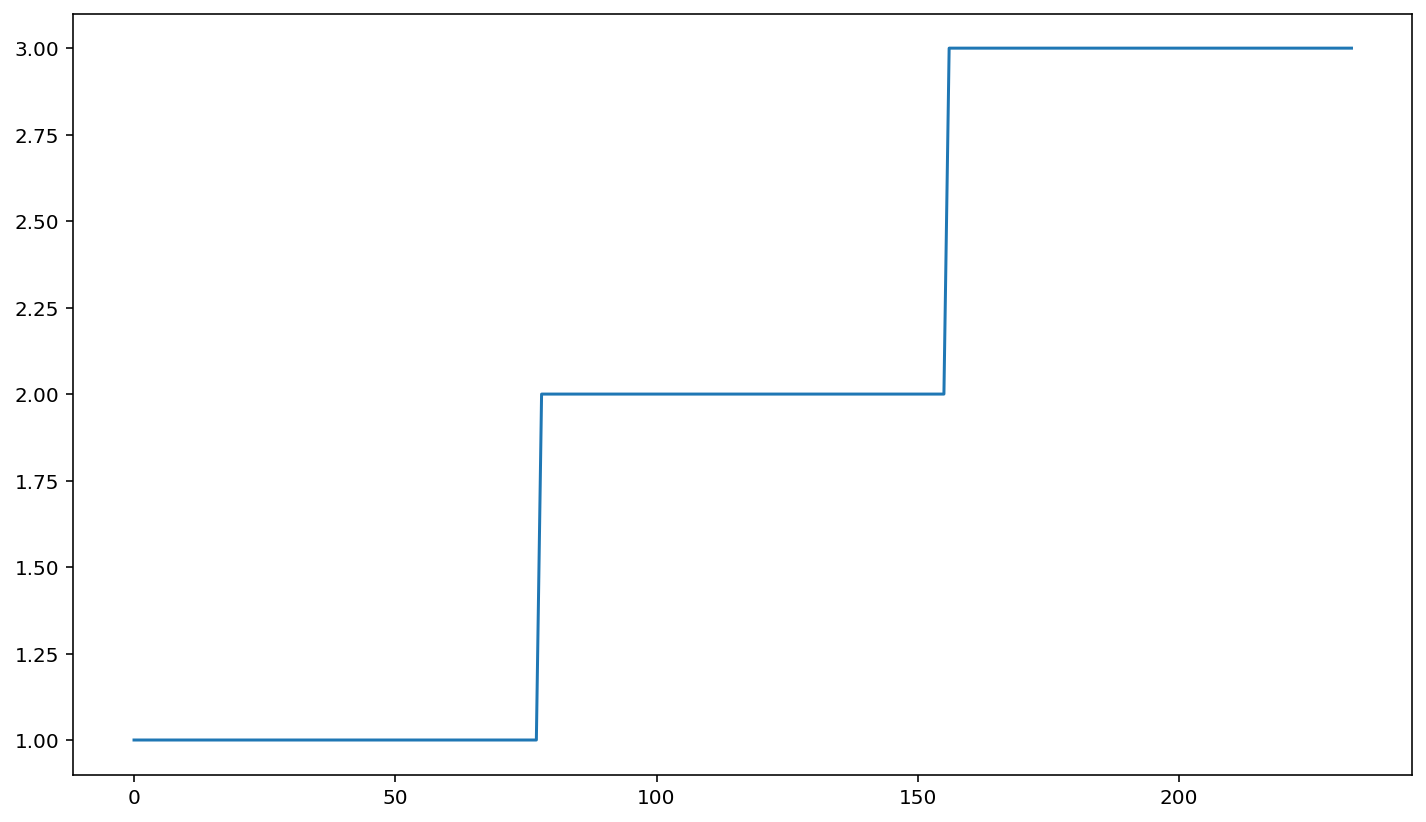

In [34]:
plt.plot(y)

Como podemos observar, el dataframe viene ordenado según la clase que intentamos predecir, por lo tanto usaremos un K-Fold con shuffle

In [35]:
kf = KFold(n_splits=5, shuffle = True, random_state = 42)

In [36]:
acc_per_k = []
scores2 = []
ks = []
k = 1
while k <= 40:
    neigh = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
        neigh.fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        scores2.append(accuracy_score(y_test, y_pred))
    acc_per_k.append(statistics.mean(scores2))
    scores2 = []
    ks.append(k)
    k+=1

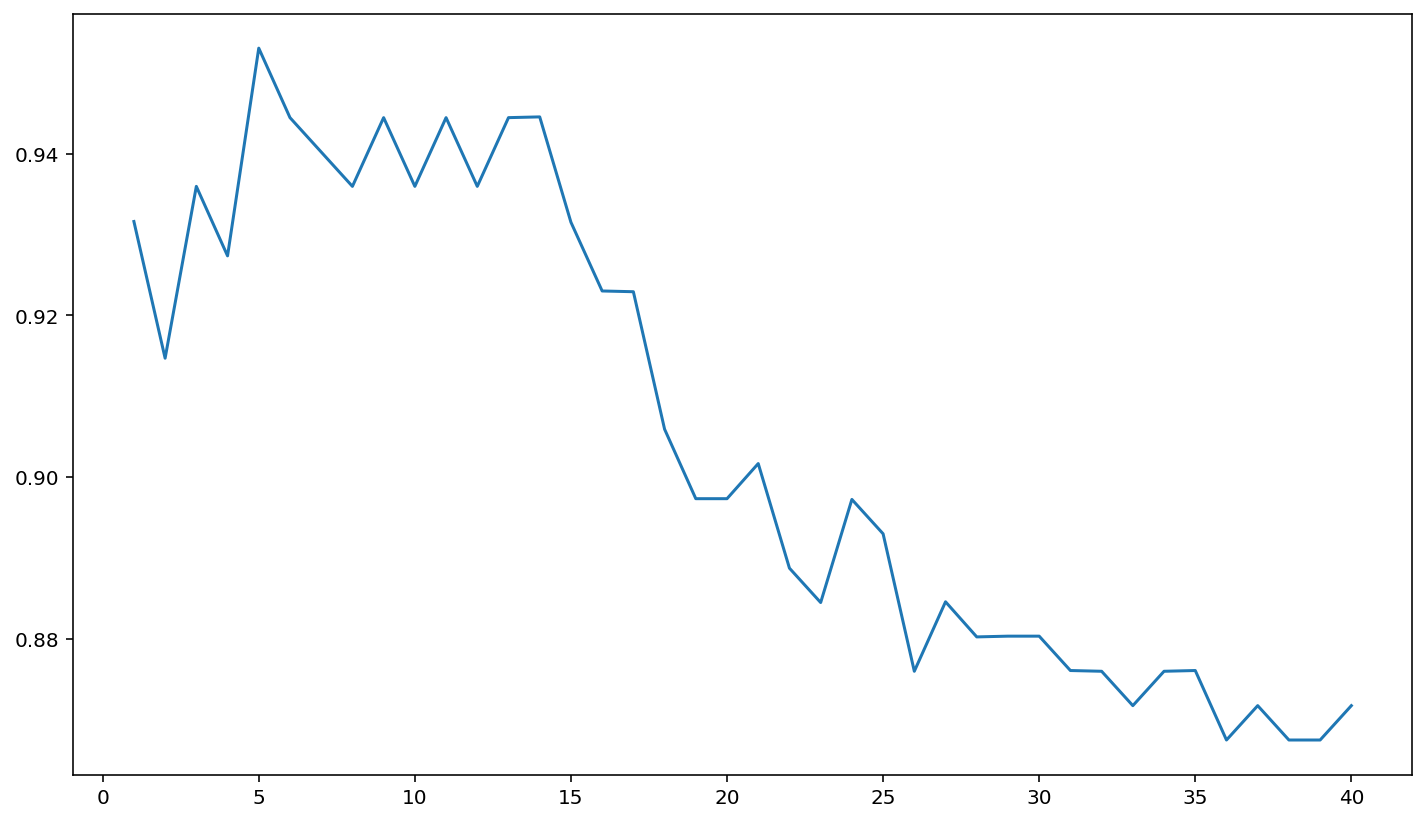

In [37]:
plt.plot(ks,acc_per_k)

In [38]:
kop = ks[acc_per_k.index(max(acc_per_k))]
print(kop)
print(acc_per_k[ks.index(kop)])

5
0.9530989824236817


El valor óptimo de k para los datos probados es 5, alcanzando una precisión del 95.3% al usar el random state de 42 en el K-Fold.

### Con la misma base de datos, calculen la exactitud de un clasificador SVM lineal para diferentes valores del factor de regularización C = 0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007, ..., 0.0001. De acuerdo a los resultados del apartado anterior, ¿qué valor de este parámetro es el óptimo?

In [39]:
acc_per_C = []
scores2 = []
cs = np.arange(0.000001,0.000101,0.000001)
kf = KFold(n_splits=5, shuffle = True, random_state = 42)
for c in cs:
    clf = svm.SVC(C = c, kernel = 'linear')
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores2.append(accuracy_score(y_test, y_pred))
    acc_per_C.append(statistics.mean(scores2))
    scores2 = []

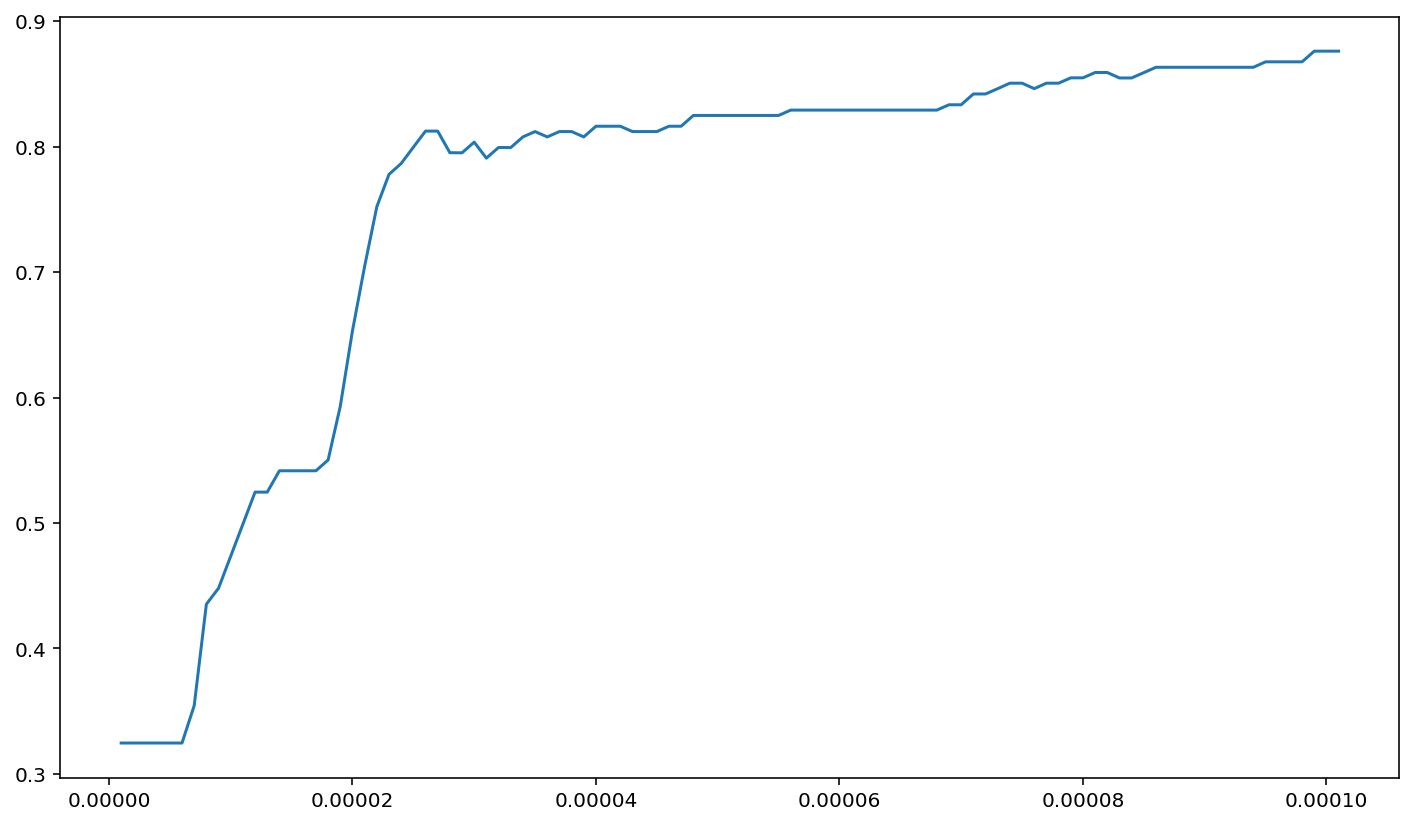

In [40]:
plt.plot(cs,acc_per_C)

In [41]:
cop = cs[acc_per_C.index(max(acc_per_C))]
print(cop)
print(acc_per_C[list(cs).index(cop)])

9.9e-05
0.8761332099907493


El valor de C que maximiza la precisión del modelo es C=0.000099 que obtiene una precisión del 87.6% usando el random state 42, sin embargo se empieza a estabilizar desde C=0.000030.

### Con la misma base de datos, calculen la exactitud de un clasificador SVM de base radial para diferentes valores del parámetro del kernel gamma = 0.000001. 0.000002. 0.000003. 0.000004. 0.000005. 0.000006, ..., 0.001. De acuerdo a los resultados del apartado anterior, ¿qué valor seleccionarías para este parámetro?

In [42]:
acc_per_g = []
scores2 = []
gammas = np.arange(0.000001,0.001001,0.000001)
kf = KFold(n_splits=5, shuffle = True, random_state = 42)
for g in gammas:
    clf = svm.SVC(gamma = g, kernel = 'rbf')
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores2.append(accuracy_score(y_test, y_pred))
    acc_per_g.append(statistics.mean(scores2))
    scores2 = []

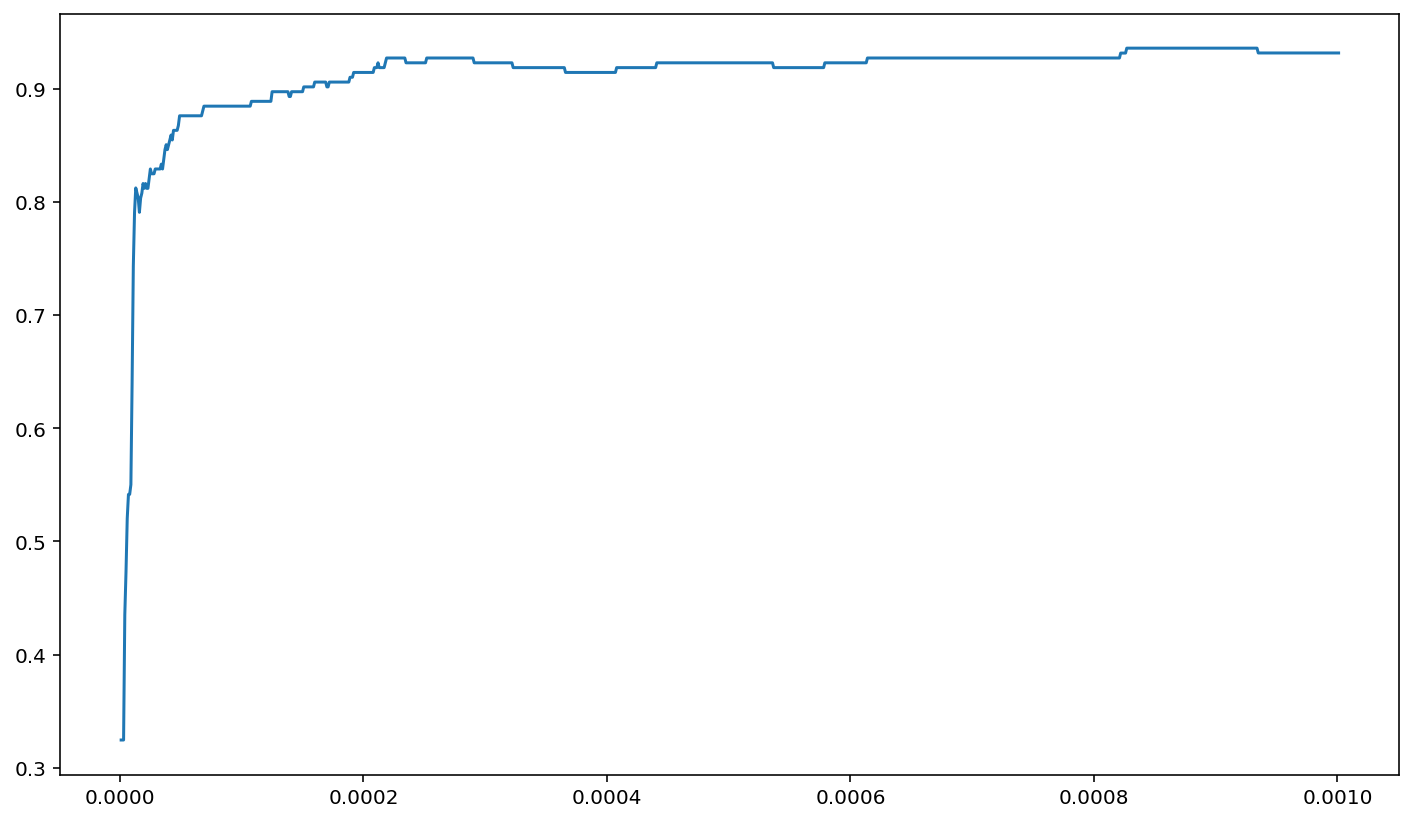

In [43]:
plt.plot(gammas,acc_per_g)

In [44]:
gop = gammas[acc_per_g.index(max(acc_per_g))]
print(gop)
print(acc_per_g[list(gammas).index(gop)])

0.0008269999999999999
0.9358926919518964


El valor de gamma que maximiza la precisión del modelo es gamma = 0.000827 que alcanza una precisión del 93.6% con el random state 42.

## Problema 5

In [117]:
dfm3 = pd.read_csv('misterious_data_3.txt', header = None, delimiter = "   ")
dfm3.head()

<ipython-input-117-e876f6b3944a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfm3 = pd.read_csv('misterious_data_3.txt', header = None, delimiter = "   ")


,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1,0.469168,0.178952,0.255712,0.744816,1.246886,1.254866,0.804426,0.412733,0.258974,...,0.993407,-0.592111,-1.301687,-1.066966,-0.722061,-0.622120,-0.396476,0.133550,0.594973,0.691093
1,1,0.184388,0.194901,0.386090,0.796802,1.066347,0.799498,0.074394,-0.544738,-0.580456,...,-0.003908,-0.167604,-0.428945,-0.725686,-1.053406,-1.276862,-1.183251,-0.693138,0.016754,0.573650
2,1,-0.173341,0.145202,-0.304082,-1.414886,-2.213521,-1.913048,-0.831063,-0.007732,0.002380,...,1.902134,3.393694,3.131702,1.403325,-0.030289,-0.271096,-0.198293,-0.751224,-1.350148,-0.882644
3,1,-0.268590,0.599522,1.307578,1.167486,0.251935,-0.585627,-0.553452,0.185590,0.613321,...,-1.296833,-0.876860,-1.043880,-1.516590,-1.531095,-1.016308,-0.483549,-0.267818,-0.367672,-0.666145
4,1,2.525379,2.852672,2.172197,0.637552,-0.600348,-0.702175,-0.074887,0.279032,-0.025487,...,-0.890283,-0.624969,-0.753863,-0.854603,-0.736751,-0.614611,-0.587151,-0.409589,0.087732,0.646462


### Carguen la base de datos misteriosa 3  descargar, y evalúen el rendimiento de un clasificador SVM lineal. Calcula para ello el recall por clase, la precisión por clase y la exactitud del clasificador. De acuerdo al recall por clase obtenido

In [118]:
xm3 = dfm3.iloc[:,1:]
ym3 = dfm3.iloc[:,0]
ym3.value_counts()

2    1323
1     264
Name: 0, dtype: int64

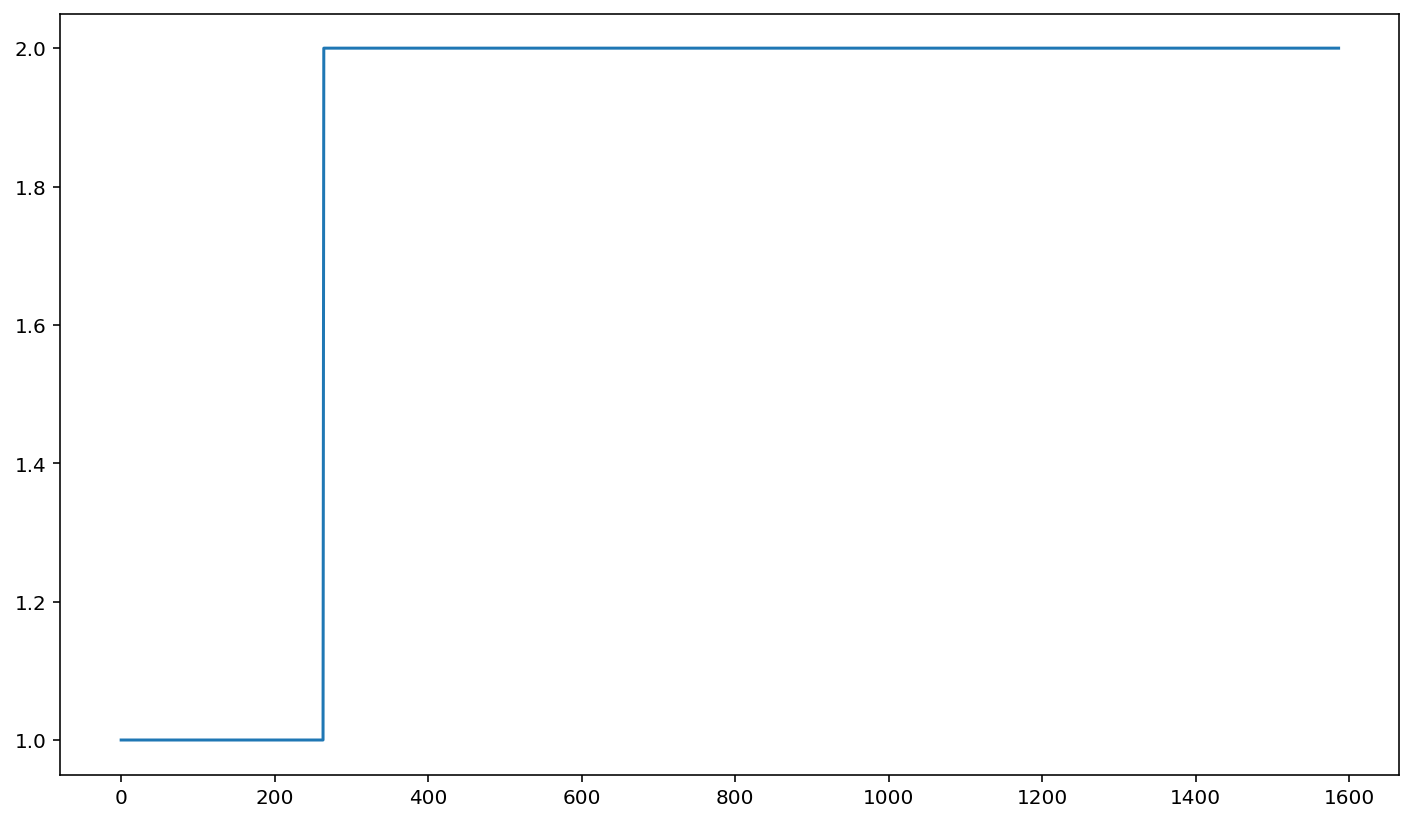

In [119]:
plt.plot(ym3)

In [120]:

kf = KFold(n_splits=5, shuffle = True, random_state = 424)
clf = svm.SVC(kernel = 'linear')

acc = 0
rec = np.array([0., 0.])
pre = np.array([0., 0.])

In [121]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(xm3, ym3):
    xm3_train, xm3_test = xm3.iloc[train_index], xm3.iloc[test_index]
    ym3_train, ym3_test = ym3.iloc[train_index], ym3.iloc[test_index]
    clf.fit(xm3_train, ym3_train)
    ym3_pred = clf.predict(xm3_test)
    acc+=(accuracy_score(ym3_test, ym3_pred))
    rec+=(recall_score(ym3_test, ym3_pred, average=None))
    pre+=(precision_score(ym3_test, ym3_pred, average=None))

acc = acc/5
rec = rec/5
pre = pre/5

In [122]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.8941432057615618
Recall:  [0.61001451 0.9508805 ]
Precision:  [0.71532519 0.92437579]


### ¿Consideras que el clasificador tiene un buen rendimiento?

No. Si bien la exactitud es del 89.4%, se tiene que observar que el recall y la precisión para la clase 1 no son tan buenos (61% y 71.5% respectivamente). Es decir, el clasificador no está haciendo un buen trabajo para una de las clases, aquella con menor cantidad de observaciones.

### Balancea la muestra utilizando submuestreo para la clase con más observaciones.

In [123]:
dfm3_sub = dfm3.iloc[:528,:]

In [124]:
xm3_sub = dfm3_sub.iloc[:,1:]
ym3_sub = dfm3_sub.iloc[:,0]
ym3_sub.value_counts()

1    264
2    264
Name: 0, dtype: int64

In [125]:

skf = StratifiedKFold(n_splits=5)

acc = 0
rec = np.array([0., 0.])
pre = np.array([0., 0.])

for train_index, test_index in skf.split(xm3_sub, ym3_sub):
    xm3_train, xm3_test = xm3_sub.iloc[train_index], xm3_sub.iloc[test_index]
    ym3_train, ym3_test = ym3_sub.iloc[train_index], ym3_sub.iloc[test_index]
    clf.fit(xm3_train, ym3_train)
    ym3_pred = clf.predict(xm3_test)
    acc+=(accuracy_score(ym3_test, ym3_pred))
    rec+=(recall_score(ym3_test, ym3_pred, average=None))
    pre+=(precision_score(ym3_test, ym3_pred, average=None))

acc = acc/5
rec = rec/5
pre = pre/5

In [126]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.7821383647798742
Recall:  [0.77285922 0.79143687]
Precision:  [0.78988389 0.77827668]


### ¿Se observa una mejor exactitud en el clasificador?

No se observa mejora en la exactitud. Además, mientras se nota que los indicadores de la clase 1 mejoran, los de la clase que tenía más observaciones empeoraron.

### Balancea la muestra utilizando sobremuestreo para la clase con menos observaciones.

In [127]:
clf = svm.SVC(kernel = 'linear')


kf = KFold(n_splits=5, shuffle = True, random_state = 42)
clf = svm.SVC(kernel = 'linear')

acc = 0
rec = np.array([0., 0.])
pre = np.array([0., 0.])

In [128]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# summarize class distribution
print(Counter(ym3))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
xm3_over, ym3_over = oversample.fit_resample(xm3, ym3)
# summarize class distribution
print(Counter(ym3_over))

Counter({2: 1323, 1: 264})
Counter({1: 1323, 2: 1323})


In [133]:

skf = StratifiedKFold(n_splits=5)

acc = 0
rec = np.array([0., 0.])
pre = np.array([0., 0.])

for train_index, test_index in skf.split(xm3_over, ym3_over):
    xm3_over_train, xm3_over_test = xm3_over.iloc[train_index], xm3_over.iloc[test_index]
    ym3_over_train, ym3_over_test = ym3_over.iloc[train_index], ym3_over.iloc[test_index]
    clf.fit(xm3_over_train, ym3_over_train)
    ym3_over_pred = clf.predict(xm3_over_test)
    acc+=(accuracy_score(ym3_over_test, ym3_over_pred))
    rec+=(recall_score(ym3_over_test, ym3_over_pred, average=None))
    pre+=(precision_score(ym3_over_test, ym3_over_pred, average=None))

acc = acc/5
rec = rec/5
pre = pre/5

In [132]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.8847344580375933
Recall:  [0.91007147 0.85941109]
Precision:  [0.86617235 0.90543183]


### ¿Se observa una mejor exactitud en el clasificador?

Mediante el sobremuestreo se mejoran todas las evaluaciones obtenida por submuestreo. Por otro lado, no supera la exactitud del modelo sin el uso de estas técnicas, aunque sí mejor la identificación de la clase que originalmente daba problemas.

### Con los datos originales, indica al clasificador SVM que la muestra debe ser balanceada (parámetro class_weight='balanced'). 

In [136]:
clf = svm.SVC(kernel = 'linear', class_weight='balanced')

acc = 0
rec = np.array([0., 0.])
pre = np.array([0., 0.])

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(xm3, ym3):
    xm3_train, xm3_test = xm3.iloc[train_index], xm3.iloc[test_index]
    ym3_train, ym3_test = ym3.iloc[train_index], ym3.iloc[test_index]
    clf.fit(xm3_train, ym3_train)
    ym3_pred = clf.predict(xm3_test)
    acc+=(accuracy_score(ym3_test, ym3_pred))
    rec+=(recall_score(ym3_test, ym3_pred, average=None))
    pre+=(precision_score(ym3_test, ym3_pred, average=None))

acc = acc/5
rec = rec/5
pre = pre/5

In [137]:
print("Accuracy: ",acc)
print("Recall: ",rec)
print("Precision: ",pre)

Accuracy:  0.8987273959410779
Recall:  [0.92217267 0.87528588]
Precision:  [0.88080872 0.91987773]


### ¿Observas alguna mejora respecto al primer punto?

La mejora de la exactitud es casi imperceptible porque solo hay una mejora de .0046, los clasificadores de la clase 1 mejoran notablemente mientras que por su parte los indicadores de la clase 2 se entorpecen un poco.